# Authenticate to Twitter

In [131]:
import pandas as pd
import tweepy as tw
import numpy as np
import matplotlib.pyplot as plt

In [132]:
consumer_key='XsxeNqtPTvvtUAgTHThSa2zEG'
consumer_secret='qSJdZaJBjI11Gfi4Odc5e40JXikioBMxDVqEmgCPg4AivQaGMz'
access_token='1193077964121853957-rnhnICmBIu6dszrGiRDnRVwMNaE2eb'
access_token_secret='lCZ1oipxnEYD4WORQvZazhb2Kp3An2G9XO5XEloAuKBto'

In [133]:
#Authenticate
auth=tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tw.API(auth,wait_on_rate_limit=True)

In [134]:
client = tw.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAGRQhAEAAAAA3LJe3GQhMlupaXXt%2BcnAAtR9tik%3DNT7NrcN10bDGit8q0TRtElMk5h3e4Fej3F7fLYEHKq3X7JnkyW')

# Getting the tweets

In [170]:
hashtag = input() #This decides what our sentiment analysis is going to be about
tweets=tw.Paginator(client.search_recent_tweets, query=hashtag,tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=1000)

#MWII


In [171]:
tweet_dict=[{"Tweets":tweet.text,"Timestamp":tweet.created_at} for tweet in tweets]

In [172]:
tweet_dict[:10]

[{'Tweets': 'RT @Elixir_xr: بمناسبة نزول البيتا هذا الاسبوع، حاب اعلن اول سحب اسويه. السحب راح يكون على ٥ نسخ لعبة #MWII و الفايز يقدر يستبدل الجائزة بم…',
  'Timestamp': datetime.datetime(2022, 9, 16, 13, 39, 56, tzinfo=datetime.timezone.utc)},
 {'Tweets': 'RT @AndrewTyrrell_: DOING A GIVEAWAY FOR BETA CODES FOR #MW2 #MWII GOOD LUCK, ILL PICK THE WINNER IN 15 MINUTES!!!!',
  'Timestamp': datetime.datetime(2022, 9, 16, 13, 39, 54, tzinfo=datetime.timezone.utc)},
 {'Tweets': 'I have few #ModernWarfare2 #MWII codes to give away for this weekend! Must following all to win! 👇🏽\n\n✅ https://t.co/cOXwGIwpc5 ✅https://t.co/kDOOKoF1P4 \n✅https://t.co/Dmk6CKuqL3\n✅https://t.co/jpX799zrEv',
  'Timestamp': datetime.datetime(2022, 9, 16, 13, 39, 52, tzinfo=datetime.timezone.utc)},
 {'Tweets': 'RT @pamajOOC: 💦⚾️⚾️ #MWII https://t.co/G3a9BzT5rZ',
  'Timestamp': datetime.datetime(2022, 9, 16, 13, 39, 50, tzinfo=datetime.timezone.utc)},
 {'Tweets': 'RT @FREEMW2BETACODE: Just restocked 300 #MW2 #MWII #M

In [173]:
df=pd.DataFrame.from_dict(tweet_dict)
df.head()

,Tweets,Timestamp
0,RT @Elixir_xr: بمناسبة نزول البيتا هذا الاسبوع...,2022-09-16 13:39:56+00:00
1,RT @AndrewTyrrell_: DOING A GIVEAWAY FOR BETA ...,2022-09-16 13:39:54+00:00
2,I have few #ModernWarfare2 #MWII codes to give...,2022-09-16 13:39:52+00:00
3,RT @pamajOOC: 💦⚾️⚾️ #MWII https://t.co/G3a9BzT5rZ,2022-09-16 13:39:50+00:00
4,RT @FREEMW2BETACODE: Just restocked 300 #MW2 #...,2022-09-16 13:39:47+00:00


# Preprocessing

In [174]:
import nltk
from nltk.corpus import stopwords

import textblob
from textblob import Word,TextBlob

In [175]:
stop_words=stopwords.words('english')
custom_stopwords=['RT',hashtag]

In [176]:
import re,string

#Removes links from the tweet
def strip_links(text):
    link_regex = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

#Removes hashtags and mentions from the tweet
def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

df['Preprocessed Tweet']=df['Tweets'].apply(lambda x:strip_all_entities(strip_links(x)))

In [177]:
#Removing stopwords and custom stopwords
def preprocess_tweets(tweet,custom_stopwords):
    preprocessed_tweet=tweet
    preprocessed_tweet.replace('[^\w\s]','')
    preprocessed_tweet=" ".join(word for word in preprocessed_tweet.split() if word not in stop_words)
    preprocessed_tweet=" ".join(word for word in preprocessed_tweet.split() if word not in custom_stopwords)
    preprocessed_tweet=" ".join(Word(word).lemmatize() for word in preprocessed_tweet.split())
    return(preprocessed_tweet)

df['Preprocessed Tweet']=df['Preprocessed Tweet'].apply(lambda x:preprocess_tweets(x,custom_stopwords))

In [178]:
df=df.sample(frac=1,random_state=1).reset_index() #Shuffling sample just to get different head values

In [179]:
df.head()

,index,Tweets,Timestamp,Preprocessed Tweet
0,507,RT @TheEsportsCloud: JUST GOT EMAILED 50 MORE ...,2022-09-16 13:25:23+00:00,JUST GOT EMAILED 50 MORE BETA CODES Who’s acti...
1,818,RT @CODmwfeed: 🚨GIVEAWAY 🚨MW2 BETA CODE (ALL P...,2022-09-16 13:16:48+00:00,🚨GIVEAWAY 🚨MW2 BETA CODE ALL PLATFORMS To Ente...
2,452,RT @Gameblog: 🚨⭐ CONCOURS ⭐🚨\n\n@CallofDutyFR ...,2022-09-16 13:27:01+00:00,🚨⭐ CONCOURS ⭐🚨 et Gameblog vous font gagner 5 ...
3,368,RT @Pearja_: 🎁 Giveaway / Concours 🔥\n\nJ'ai 3...,2022-09-16 13:29:40+00:00,🎁 Giveaway Concours 🔥 J ai 3 code pour la Beta...
4,242,RT @TheEsportsCloud: JUST GOT EMAILED 50 MORE ...,2022-09-16 13:33:12+00:00,JUST GOT EMAILED 50 MORE BETA CODES Who’s acti...


# Calculate Sentiment

In [180]:
df['polarity']=df['Preprocessed Tweet'].apply(lambda x:TextBlob(x).sentiment[0])
df['subjectivity']=df['Preprocessed Tweet'].apply(lambda x:TextBlob(x).sentiment[1])

In [181]:
df[['polarity','subjectivity']].agg([np.mean,np.max,np.min,np.median])

,polarity,subjectivity
mean,0.085795,0.179017
amax,1.000000,1.000000
amin,-0.600000,0.000000
median,0.000000,0.000000


In [182]:
df.shape

(1000, 6)

In [183]:
moving_average=df[['Timestamp','polarity']]
moving_average=moving_average.sort_values(by="Timestamp",ascending=True)
moving_average['MA polarity']=moving_average.polarity.rolling(10,min_periods=3).mean()

In [184]:
moving_average.head()

,Timestamp,polarity,MA polarity
735,2022-09-16 13:12:30+00:00,0.15,NaN
665,2022-09-16 13:12:30+00:00,0.15,NaN
201,2022-09-16 13:12:32+00:00,0.15,0.15
134,2022-09-16 13:12:32+00:00,0.15,0.15
49,2022-09-16 13:12:32+00:00,0.15,0.15


Text(0.5, 1.0, '#MWII 10 Tweet moving average polarity')

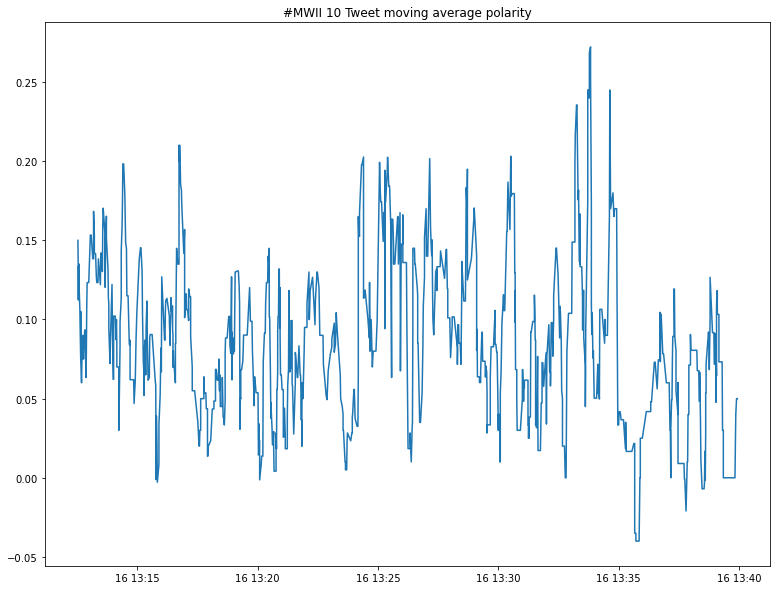

In [185]:
fig,axes=plt.subplots(1,1,figsize=(13,10))
axes.plot(moving_average['Timestamp'],moving_average['MA polarity'])
axes.set_title(hashtag+" 10 Tweet moving average polarity")